# Why PCA?

The main goal of a PCA analysis is to identify patterns in data; PCA aims to detect the correlation between variables. If a strong correlation between variables exists, the attempt to reduce the dimensionality only makes sense. In a nutshell, this is what PCA is all about: Finding the directions of maximum variance in high-dimensional data and project it onto a smaller dimensional subspace while retaining most of the information.

In [2]:
import pandas as pd
import numpy as np
import sklearn as sk

In [3]:
df = pd.read_csv('/Users/admin/my-documents/data-set/titanic/train.csv')
df.shape

(891, 12)

In [4]:
df.dropna(how="all", inplace=True)
df.shape

(891, 12)

In [5]:
df.head(8)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [6]:
# split data table into data X and class labels y
X = df[['Pclass', 'Sex', 'Age', 'Fare']].values

y = df['Survived'].values

In [7]:
X

array([[3, 'male', 22.0, 7.25],
       [1, 'female', 38.0, 71.2833],
       [3, 'female', 26.0, 7.925],
       ...,
       [3, 'female', nan, 23.45],
       [1, 'male', 26.0, 30.0],
       [3, 'male', 32.0, 7.75]], dtype=object)

# Exploration

In [8]:
import plotly.plotly as py
from plotly.graph_objs import *
import plotly.tools as tls

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline
init_notebook_mode(connected=True)

In [9]:
import warnings 

In [10]:
warnings.filterwarnings('ignore')

In [11]:
from plotly.graph_objs import Histogram
import plotly

In [12]:
# plotting histograms

traces = []

legend = {0:False, 1:False, 2:False, 3:True}

colors = {0: 'rgb(31, 119, 180)', 
          1: 'rgb(255, 127, 14)'
         }

for col in range(4):
    for key in colors:
        traces.append(plotly.graph_objs.Histogram(x=X[y==key, col], 
                        opacity=0.75,
                        xaxis='x%s' %(col+1),
                        marker=Marker(color=colors[key]),
                        name=key,
                        showlegend=legend[col]))

data = Data(traces)

layout = Layout(barmode='overlay',
                xaxis=XAxis(domain=[0, 0.25], title='Pclass'),
                xaxis2=XAxis(domain=[0.3, 0.5], title='Sex'),
                xaxis3=XAxis(domain=[0.55, 0.75], title='Age'),
                xaxis4=XAxis(domain=[0.8, 1], title='Fare'),
                yaxis=YAxis(title='Count'),
                title='Distribution of the different Travellers')

fig = Figure(data=data, layout=layout)
iplot(fig)

# Standardizing

Whether to standardize the data prior to a PCA on the covariance matrix depends on the measurement scales of the original features. Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially, if it was measured on different scales. Although, all features in the titanic dataset were measured in centimeters, let us continue with the transformation of the data onto unit scale (mean=0 and variance=1), which is a requirement for the optimal performance of many machine learning algorithms.

In [13]:
from sklearn.preprocessing import StandardScaler
import math

In [14]:
std = StandardScaler()
std

StandardScaler(copy=True, with_mean=True, with_std=True)

In [15]:
df.dropna(inplace=True)
X = list(df[['Pclass', 'Age', 'Fare']].values)
X


std.fit(X)

        

StandardScaler(copy=True, with_mean=True, with_std=True)

In [16]:
# Checking correlation
df[['Pclass', 'Age', 'Fare']].corr()

,Pclass,Age,Fare
Pclass,1.000000,-0.306514,-0.315235
Age,-0.306514,1.000000,-0.092424
Fare,-0.315235,-0.092424,1.000000


In [17]:
X_std = std.transform(X)

In [18]:
std.mean_, std.var_

(array([ 1.19125683, 35.67442623, 78.68246885]),
 array([2.63967273e-01, 2.43393217e+02, 5.79714066e+03]))

In [19]:
X_std = StandardScaler().fit_transform(X)

In [20]:
import numpy as np
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00549451 -0.30819841 -0.31696744]
 [-0.30819841  1.00549451 -0.09293168]
 [-0.31696744 -0.09293168  1.00549451]]


In [21]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.00549451 -0.30819841 -0.31696744]
 [-0.30819841  1.00549451 -0.09293168]
 [-0.31696744 -0.09293168  1.00549451]]


In [22]:
cov_mat = np.cov(X_std.T)

??np.linalg.eig(cov_mat)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.66913812 -0.74310992  0.00646664]
 [-0.52042955  0.462377   -0.71788619]
 [-0.53047833  0.48373045  0.69613044]]

Eigenvalues 
[0.51450482 1.40359261 1.09838608]


In [23]:
cor_mat1 = np.corrcoef(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.66913812 -0.74310992  0.00646664]
 [-0.52042955  0.462377   -0.71788619]
 [-0.53047833  0.48373045  0.69613044]]

Eigenvalues 
[0.51169332 1.39592271 1.09238397]


In [24]:
modified_X = np.array(X)
cor_mat2 = np.corrcoef(modified_X.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat2)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)


Eigenvectors 
[[-0.66913812 -0.74310992  0.00646664]
 [-0.52042955  0.462377   -0.71788619]
 [-0.53047833  0.48373045  0.69613044]]

Eigenvalues 
[0.51169332 1.39592271 1.09238397]


In [25]:
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In [26]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
1.3959227098986933
1.092383972424207
0.5116933176770997


In [27]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

trace1 = Bar(
        x=['PC %s' %i for i in range(1,5)],
        y=var_exp,
        showlegend=False)

trace2 = Scatter(
        x=['PC %s' %i for i in range(1,5)], 
        y=cum_var_exp,
        name='cumulative explained variance')

data = Data([trace1, trace2])

layout=Layout(
        yaxis=YAxis(title='Explained variance in percent'),
        title='Explained variance by different principal components')

fig = Figure(data=data, layout=layout)
iplot(fig)

In [28]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), 
                      eig_pairs[1][1].reshape(3,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.74310992  0.00646664]
 [ 0.462377   -0.71788619]
 [ 0.48373045  0.69613044]]


In [ ]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=3)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [30]:
sklearn_pca.explained_variance_ratio_

array([0.46530757, 0.36412799, 0.17056444])

In [31]:
Y_sklearn.shape

(183, 3)

In [32]:
Y_sklearn

array([[-2.98542688e-01, -1.77068823e-01, -2.23064710e-01],
       [-9.41069015e-02, -2.05271200e-01, -4.49827890e-01],
       [-6.49357792e-01, -1.09087444e+00,  1.75363405e-01],
       [ 3.94864586e+00,  9.13571746e-01,  8.67226293e-01],
       [-6.07091058e-01, -1.50636477e+00,  1.32439530e-01],
       [ 1.63666166e+00, -5.13299596e-01,  5.39816249e-01],
       [ 2.25173145e-01, -4.40797043e-02, -8.05961447e-01],
       [-9.53455341e-01,  2.45006564e+00,  4.78858163e-01],
       [-6.59154714e-01, -6.33444794e-01,  1.81822693e-01],
       [-1.03964462e+00, -1.50454578e+00,  6.12793390e-01],
       [-5.83462408e-01, -3.87707835e-01,  9.53879271e-02],
       [ 1.80073245e+00, -3.06080805e-01,  3.55605190e-01],
       [ 3.38375474e+00, -1.35490765e-01,  1.50470322e+00],
       [-1.07200546e+00,  2.26600482e+00,  6.12292532e-01],
       [-4.71422279e-01, -6.37609587e-01, -2.66229170e-02],
       [-1.04386701e+00, -2.03046660e+00,  6.22565130e-01],
       [ 1.96369815e-01,  4.40701821e-01

In [33]:
traces = []

for name in ('Pclass', 'Age', 'Fare'):

    trace = Scatter(
        x=Y_sklearn[y==name,0],
        y=Y_sklearn[y==name,1],
        mode='markers',
        name=name,
        marker=Marker(
            size=12,
            line=Line(
                color='rgba(217, 217, 217, 0.14)',
                width=0.5),
            opacity=0.8))
    traces.append(trace)


data = Data(traces)
layout = Layout(xaxis=XAxis(title='PC1', showline=False),
                yaxis=YAxis(title='PC2', showline=False))
fig = Figure(data=data, layout=layout)
iplot(fig)

# Heat map with correlation coefficient

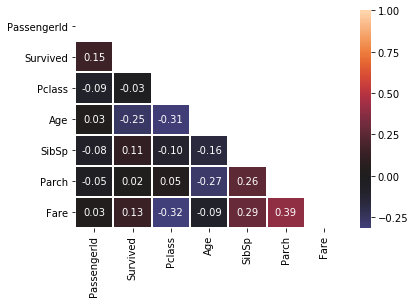

In [35]:
import seaborn as sns
import numpy as np
corr=df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
# Add the mask to the heatmap
sns.heatmap(corr, mask=mask,  center=0, linewidths=1, annot=True, fmt=".2f")

# Visualize a decision tree

In [36]:
#### Visualize a decision tree

from sklearn.datasets import load_iris
iris = load_iris()

# Model (can also use single decision tree)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(iris.data, iris.target)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
#from subprocess import call
#call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
#from subprocess import check_call
#check_call(['dot','-Tpng','tree.dot','-o','tree.png'])
import pydot

(graph,) = pydot.graph_from_dot_file('tree.dot')


# Display in jupyter notebook
#from IPython.display import Image
#Image(filename = 'tree.dot')

In [37]:
graph.write_png('tree.png')